# SPECFEM3D_GLOBE - noteboook

## Simple Google Colab example

To open this notebook in Google Colab, follow this link:

[google colab - specfem3d_globe-colab-example.ipynb](https://colab.research.google.com/github/SPECFEM/specfem3d_globe/blob/devel/EXAMPLES/notebooks/specfem3d_globe-colab-example.ipynb)


This script will load the SPECFEM3D_GLOBE github repository and run a default example for testing.

To enable the GPU:
- navigate to Edit -> **Notebook Settings**...<br>
  and select **T4 GPU** from the Hardware Accelerator drop-down

# Setup

system info:

In [1]:
! uname -a

Linux 9a1c393609c4 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


for GPU nodes:

In [2]:
! nvidia-smi

import os
gpu = os.environ['COLAB_GPU']
if len(gpu) == 0:
  has_gpu = False
  print("runtime has no gpu")
else:
  has_gpu = True
  print("gpu: ",gpu)

Mon Feb 12 15:56:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

current directory:

In [3]:
! pwd
! ls -al

/content
total 16
drwxr-xr-x 1 root root 4096 Feb  8 14:21 .
drwxr-xr-x 1 root root 4096 Feb 12 15:54 ..
drwxr-xr-x 4 root root 4096 Feb  8 14:20 .config
drwxr-xr-x 1 root root 4096 Feb  8 14:21 sample_data


compilers:

In [4]:
! which gcc
! which gfortran
! which nvcc

/usr/bin/gcc
/usr/bin/gfortran
/usr/local/cuda/bin/nvcc


In [5]:
! gcc --version
! gfortran --version
! nvcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
! which mpif90
! which mpirun

/usr/bin/mpif90
/usr/bin/mpirun


In [7]:
! mpif90 --version
! mpirun --version

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

mpirun (Open MPI) 4.1.2

Report bugs to http://www.open-mpi.org/community/help/


download SPECFEM3D_GLOBE repository:

In [8]:
! git clone --branch devel https://github.com/SPECFEM/specfem3d_globe.git

Cloning into 'specfem3d_globe'...
remote: Enumerating objects: 60386, done.
remote: Counting objects: 100% (1294/1294), done.
remote: Compressing objects: 100% (593/593), done.
remote: Total 60386 (delta 704), reused 1176 (delta 687), pack-reused 59092
Receiving objects: 100% (60386/60386), 2.15 GiB | 33.63 MiB/s, done.
Resolving deltas: 100% (40081/40081), done.
Updating files: 100% (3966/3966), done.


# Configuration

Let's configure and compile the package:

In [9]:
%cd /content/specfem3d_globe
! ls -al

/content/specfem3d_globe
total 672
drwxr-xr-x 17 root root   4096 Feb 12 15:58 .
drwxr-xr-x  1 root root   4096 Feb 12 15:56 ..
-rw-r--r--  1 root root    134 Feb 12 15:57 AUTHORS
drwxr-xr-x  2 root root   4096 Feb 12 15:57 .azure-pipelines
-rw-r--r--  1 root root   6083 Feb 12 15:57 .azure-pipelines.yml
-rwxr-xr-x  1 root root   1637 Feb 12 15:58 change_simulation_type.pl
-rw-r--r--  1 root root    109 Feb 12 15:57 .codecov.yml
-rwxr-xr-x  1 root root  44908 Feb 12 15:58 config.guess
-rwxr-xr-x  1 root root  35543 Feb 12 15:58 config.sub
-rwxr-xr-x  1 root root 361966 Feb 12 15:58 configure
-rw-r--r--  1 root root  27113 Feb 12 15:58 configure.ac
-rw-r--r--  1 root root   4822 Feb 12 15:57 CONTRIBUTING.md
drwxr-xr-x 28 root root   4096 Feb 12 15:57 DATA
drwxr-xr-x  2 root root   4096 Feb 12 15:57 DATABASES_MPI
drwxr-xr-x  9 root root   4096 Feb 12 15:58 doc
-rwxr-xr-x  1 root root   2446 Feb 12 15:58 download_topo_db.bash
drwxr-xr-x 24 root root   4096 Feb 12 15:58 EXAMPLES
-rw-r--r--

default configuration

In [10]:
#! ./configure --enable-debug

now configure with CUDA support:

In [11]:
#debugging
#! ./configure --enable-debug --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64

# default w/ CUDA support
! ./configure --enable-vectorization --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64 FLAGS_CHECK="-O2 -Wall -Wno-do-subscript -Wno-conversion -Wno-maybe-uninitialized"


## ---------------------------- ##
## setting up compilation flags ##
## ---------------------------- ##
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for gfortran... gfortran
checking whether the Fortran compiler works... yes
checking for Fortran compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU Fortran... yes
checking whether gfortran accepts -g... yes
configure: running /bin/bash ./flags.guess
checking how to get verbose linking output from gfortran... -v
checking for Fortran libraries of gfortran...  -L/usr/lib/gcc/x86_64-linux-gnu/11 -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../../lib -L/lib/x86_64-linux-gnu -L/lib/../lib -L/usr/lib/x86_64-linux-gnu -L/usr/lib/../lib -L/usr/local/cuda/lib64/s

compile the code:

In [12]:
! sed -i "s:IMAIN =.*:IMAIN = ISTANDARD_OUTPUT:" setup/constants.h
! make clean
! make -j2 all

Streaming output truncated to the last 5000 lines.
src/specfem3D/compute_element.F90:1444:33:

 1440 |   DO_LOOP_IJK
      |                   2              
......
 1444 |     sigma_yy(INDEX_IJK) = sigma_yy(INDEX_IJK) - R_yy_val
      |                                 1
src/specfem3D/compute_element.F90:1445:13:

 1440 |   DO_LOOP_IJK
      |                   2
......
 1445 |     sigma_zz(INDEX_IJK) = sigma_zz(INDEX_IJK) + R_xx_val + R_yy_val
      |             1
src/specfem3D/compute_element.F90:1445:33:

 1440 |   DO_LOOP_IJK
      |                   2              
......
 1445 |     sigma_zz(INDEX_IJK) = sigma_zz(INDEX_IJK) + R_xx_val + R_yy_val
      |                                 1
gfortran  -O2 -Wall -Wno-do-subscript -Wno-conversion -Wno-maybe-uninitialized -DFORCE_VECTORIZATION -I./setup -J./obj -I./obj -I.  -I. -c -o obj/compute_element_att_memory.solverstatic.o src/specfem3D/compute_element_att_memory.F90
src/specfem3D/compute_element.F90:1446:13:

 1440 |   DO_LOOP_

In [13]:
! ls -al ./bin

total 13192
drwxr-xr-x  2 root root    4096 Feb 12 16:02 .
drwxr-xr-x 19 root root    4096 Feb 12 15:58 ..
-rwxr-xr-x  1 root root  154512 Feb 12 16:02 xaddition_sem
-rwxr-xr-x  1 root root  421624 Feb 12 16:02 xadd_model_iso
-rwxr-xr-x  1 root root  421624 Feb 12 16:02 xadd_model_tiso
-rwxr-xr-x  1 root root  421632 Feb 12 16:02 xadd_model_tiso_cg
-rwxr-xr-x  1 root root  421632 Feb 12 16:02 xadd_model_tiso_iso
-rwxr-xr-x  1 root root  150888 Feb 12 16:02 xclip_sem
-rwxr-xr-x  1 root root  247296 Feb 12 16:00 xcombine_AVS_DX
-rwxr-xr-x  1 root root  392200 Feb 12 16:02 xcombine_paraview_strain_data
-rwxr-xr-x  1 root root  150928 Feb 12 16:02 xcombine_sem
-rwxr-xr-x  1 root root  210080 Feb 12 16:02 xcombine_surf_data
-rwxr-xr-x  1 root root  273128 Feb 12 16:02 xcombine_surf_data_vtk
-rwxr-xr-x  1 root root  273128 Feb 12 16:02 xcombine_surf_data_vtu
-rwxr-xr-x  1 root root  271248 Feb 12 16:02 xcombine_vol_data
-rwxr-xr-x  1 root root  329360 Feb 12 16:02 xcombine_vol_data_vtk
-rwxr

# GPU utility

check card with the little gpu helper tool:

In [14]:
%cd /content/specfem3d_globe/utils/GPU_tools/
! nvcc --gpu-architecture=sm_75 -o check_cuda_device check_cuda_device.cu
! ./check_cuda_device

/content/specfem3d_globe/utils/GPU_tools

found number of CUDA devices = 1


GPU device id: 0

Device Name = Tesla T4

memory:
  totalGlobalMem (in MB, dividing by powers of 1024): 15102.062500
  totalGlobalMem (in GB, dividing by powers of 1024): 14.748108

  totalGlobalMem (in MB, dividing by powers of 1000): 15835.660156
  totalGlobalMem (in GB, dividing by powers of 1000): 15.835660

  sharedMemPerBlock (in bytes): 49152

blocks:
  Maximum number of registers per block: 65536
  Maximum number of threads per block: 1024
  Maximum size of each dimension of a block: 1024 x 1024 x 64
  Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535

features:
  Compute capability of the device = 7.5
  multiProcessorCount: 40
  canMapHostMemory: TRUE
  deviceOverlap: TRUE

0: GPU memory usage (dividing by powers of 1024): used = 103.000000 MB, free = 14999.062500 MB, total = 15102.062500 MB


0: GPU memory usage (dividing by powers of 1000): used = 108.003328 MB, free = 15727.6569

# Run example on CPU

Default example:

In [15]:
%cd /content/specfem3d_globe
%cd EXAMPLES/regional_Greece_small
! ls -al

/content/specfem3d_globe
/content/specfem3d_globe/EXAMPLES/regional_Greece_small
total 1448
drwxr-xr-x  5 root root   4096 Feb 12 15:58 .
drwxr-xr-x 24 root root   4096 Feb 12 15:58 ..
drwxr-xr-x  2 root root   4096 Feb 12 15:58 DATA
-rw-r--r--  1 root root  76177 Feb 12 15:58 image_alpha_kernel.jpg
-rw-r--r--  1 root root  76547 Feb 12 15:58 image_beta_kernel.jpg
-rw-r--r--  1 root root  72978 Feb 12 15:58 image_rho_kernel.jpg
-rw-r--r--  1 root root 214961 Feb 12 15:58 image_vs.jpg
lrwxrwxrwx  1 root root     64 Feb 12 15:58 paraviewpython-example.py -> ../../utils/Visualization/VTK_ParaView/paraviewpython-example.py
-rw-r--r--  1 root root   1136 Feb 12 15:58 README
drwxr-xr-x  4 root root   4096 Feb 12 15:58 REF_SEIS
-rwxr-xr-x  1 root root   1358 Feb 12 15:58 run_mesher_solver.bash
-rwxr-xr-x  1 root root   2362 Feb 12 15:58 run_mesher_solver.kernel.bash
-rwxr-xr-x  1 root root    596 Feb 12 15:58 run_this_example.kernel.sh
-rwxr-xr-x  1 root root   1789 Feb 12 15:58 run_this_exam

In [16]:
#! sed -i "s:^NSTEP .*:NSTEP = 500:" DATA/Par_file
! sed -i "s:^RECORD_LENGTH_IN_MINUTES .*:RECORD_LENGTH_IN_MINUTES = 0.1:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .false.:" DATA/Par_file

# to allow running mpirun as root
%env OMPI_ALLOW_RUN_AS_ROOT=1
%env OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1
# to allow more processes/slots
%env OMPI_MCA_rmaps_base_oversubscribe=1
%env OMPI_MCA_rmaps_base_inherit=1

! ./run_this_example.sh

env: OMPI_ALLOW_RUN_AS_ROOT=1
env: OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1
env: OMPI_MCA_rmaps_base_oversubscribe=1
env: OMPI_MCA_rmaps_base_inherit=1
running example: Mon Feb 12 04:02:29 PM UTC 2024
directory: /content/specfem3d_globe/EXAMPLES/regional_Greece_small
(will take about 15 minutes)


   setting up example...


  running script...


Mon Feb 12 04:02:31 PM UTC 2024
starting MPI mesher on 4 processors


 ****************************
 *** Specfem3D MPI Mesher ***
 ****************************

 Version: v8.1.0-1-gb6fa4b6b


 Planet: Earth


 There are            4  MPI processes
 Processes are numbered from 0 to            3

 There are           64  elements along xi in each chunk
 There are           64  elements along eta in each chunk

 There are            2  slices along xi in each chunk
 There are            2  slices along eta in each chunk
 There is a total of            4  slices in each chunk
 There are            1  chunks in the global mesh
 There is a total of          

In [17]:
! ls -al OUTPUT_FILES/

total 264
drwxr-xr-x 2 root root  4096 Feb 12 16:05 .
drwxr-xr-x 8 root root  4096 Feb 12 16:02 ..
-rw-r--r-- 1 root root   196 Feb 12 16:02 addressing.txt
-rw-r--r-- 1 root root   370 Feb 12 16:02 CMTSOLUTION
-rw-r--r-- 1 root root  7000 Feb 12 16:05 GE.ZKR.MXE.sem.ascii
-rw-r--r-- 1 root root  7000 Feb 12 16:05 GE.ZKR.MXN.sem.ascii
-rw-r--r-- 1 root root  7000 Feb 12 16:05 GE.ZKR.MXZ.sem.ascii
-rw-r--r-- 1 root root  7000 Feb 12 16:05 HT.LIT.MXE.sem.ascii
-rw-r--r-- 1 root root  7000 Feb 12 16:05 HT.LIT.MXN.sem.ascii
-rw-r--r-- 1 root root  7000 Feb 12 16:05 HT.LIT.MXZ.sem.ascii
-rw-r--r-- 1 root root   308 Feb 12 16:02 output_list_stations.txt
-rw-r--r-- 1 root root 20590 Feb 12 16:02 Par_file
-rw-r--r-- 1 root root 35000 Feb 12 16:02 plot_source_spectrum.txt
-rw-r--r-- 1 root root 12337 Feb 12 16:02 plot_source_time_function.txt
-rw-r--r-- 1 root root   383 Feb 12 16:02 receiver.vtk
-rw-r--r-- 1 root root  1962 Feb 12 16:02 RECORDHEADERS
-rw-r--r-- 1 root root   164 Feb 12 16:02 so

trace:  4 OUTPUT_FILES/YL.BEKI.MXZ.sem.ascii
trace:  3 OUTPUT_FILES/XS.S001.MXZ.sem.ascii
trace:  2 OUTPUT_FILES/SR.BGIO.MXZ.sem.ascii
trace:  1 OUTPUT_FILES/HT.LIT.MXZ.sem.ascii
trace:  0 OUTPUT_FILES/GE.ZKR.MXZ.sem.ascii


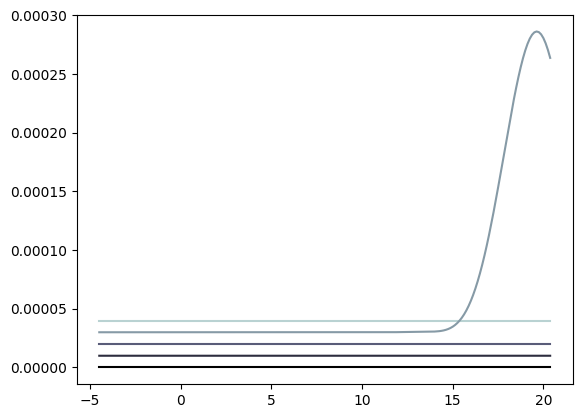

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 0.00001

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.MXZ.sem.ascii')

for i,file in enumerate(sorted(files,key=lambda x: os.path.basename(x),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

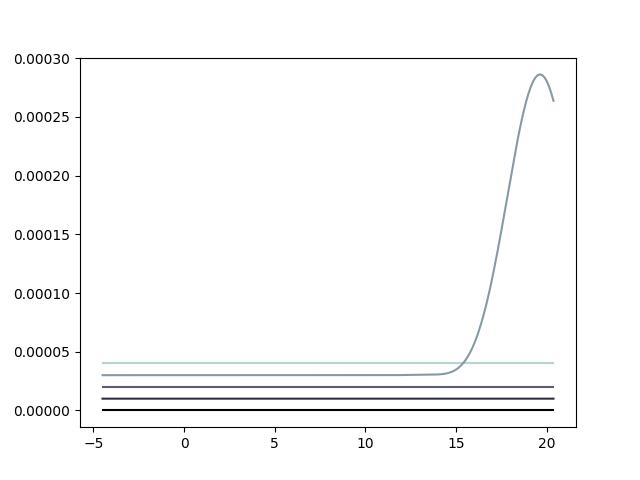

In [19]:
from IPython.display import Image, display
display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


# Run example on GPU

Let's run a default example on the GPU:

In [24]:
%cd /content/specfem3d_globe
%cd EXAMPLES/regional_Greece_small
! ls -al

/content/specfem3d_globe
/content/specfem3d_globe/EXAMPLES/regional_Greece_small
total 1468
drwxr-xr-x  8 root root   4096 Feb 12 16:02 .
drwxr-xr-x 24 root root   4096 Feb 12 15:58 ..
drwxr-xr-x  2 root root   4096 Feb 12 16:05 bin
drwxr-xr-x  2 root root   4096 Feb 12 16:05 DATA
drwxr-xr-x  2 root root  12288 Feb 12 16:05 DATABASES_MPI
-rw-r--r--  1 root root  76177 Feb 12 15:58 image_alpha_kernel.jpg
-rw-r--r--  1 root root  76547 Feb 12 15:58 image_beta_kernel.jpg
-rw-r--r--  1 root root  72978 Feb 12 15:58 image_rho_kernel.jpg
-rw-r--r--  1 root root 214961 Feb 12 15:58 image_vs.jpg
drwxr-xr-x  2 root root   4096 Feb 12 16:06 OUTPUT_FILES
lrwxrwxrwx  1 root root     64 Feb 12 15:58 paraviewpython-example.py -> ../../utils/Visualization/VTK_ParaView/paraviewpython-example.py
-rw-r--r--  1 root root   1136 Feb 12 15:58 README
drwxr-xr-x  4 root root   4096 Feb 12 15:58 REF_SEIS
-rwxr-xr-x  1 root root   1358 Feb 12 15:58 run_mesher_solver.bash
-rwxr-xr-x  1 root root   2362 Feb 12 1

In [25]:
#! sed -i "s:^NSTEP .*:NSTEP = 100:" DATA/Par_file
! sed -i "s:^RECORD_LENGTH_IN_MINUTES .*:RECORD_LENGTH_IN_MINUTES = 2.5:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .true.:" DATA/Par_file
! ./run_this_example.sh

running example: Mon Feb 12 04:07:11 PM UTC 2024
directory: /content/specfem3d_globe/EXAMPLES/regional_Greece_small
(will take about 15 minutes)


   setting up example...

ln: failed to create symbolic link './crust2.0': File exists
ln: failed to create symbolic link './s362ani': File exists
ln: failed to create symbolic link './QRFSI12': File exists
ln: failed to create symbolic link './topo_bathy': File exists

  running script...


Mon Feb 12 04:07:14 PM UTC 2024
starting MPI mesher on 4 processors


 ****************************
 *** Specfem3D MPI Mesher ***
 ****************************

 Version: v8.1.0-1-gb6fa4b6b


 Planet: Earth


 There are            4  MPI processes
 Processes are numbered from 0 to            3

 There are           64  elements along xi in each chunk
 There are           64  elements along eta in each chunk

 There are            2  slices along xi in each chunk
 There are            2  slices along eta in each chunk
 There is a total of            4  sl

In [26]:
! ls -al OUTPUT_FILES/

total 964
drwxr-xr-x 2 root root  4096 Feb 12 16:08 .
drwxr-xr-x 8 root root  4096 Feb 12 16:02 ..
-rw-r--r-- 1 root root   196 Feb 12 16:07 addressing.txt
-rw-r--r-- 1 root root   370 Feb 12 16:07 CMTSOLUTION
-rw-r--r-- 1 root root 49000 Feb 12 16:08 GE.ZKR.MXE.sem.ascii
-rw-r--r-- 1 root root 49000 Feb 12 16:08 GE.ZKR.MXN.sem.ascii
-rw-r--r-- 1 root root 49000 Feb 12 16:08 GE.ZKR.MXZ.sem.ascii
-rw-r--r-- 1 root root   704 Feb 12 16:07 gpu_device_info.txt
-rw-r--r-- 1 root root   108 Feb 12 16:07 gpu_device_mem_usage.txt
-rw-r--r-- 1 root root 49000 Feb 12 16:08 HT.LIT.MXE.sem.ascii
-rw-r--r-- 1 root root 49000 Feb 12 16:08 HT.LIT.MXN.sem.ascii
-rw-r--r-- 1 root root 49000 Feb 12 16:08 HT.LIT.MXZ.sem.ascii
-rw-r--r-- 1 root root   308 Feb 12 16:07 output_list_stations.txt
-rw-r--r-- 1 root root 20589 Feb 12 16:07 Par_file
-rw-r--r-- 1 root root 35000 Feb 12 16:07 plot_source_spectrum.txt
-rw-r--r-- 1 root root 85537 Feb 12 16:07 plot_source_time_function.txt
-rw-r--r-- 1 root root   3

plot the traces:

trace:  4 OUTPUT_FILES/YL.BEKI.MXZ.sem.ascii
trace:  3 OUTPUT_FILES/XS.S001.MXZ.sem.ascii
trace:  2 OUTPUT_FILES/SR.BGIO.MXZ.sem.ascii
trace:  1 OUTPUT_FILES/HT.LIT.MXZ.sem.ascii
trace:  0 OUTPUT_FILES/GE.ZKR.MXZ.sem.ascii


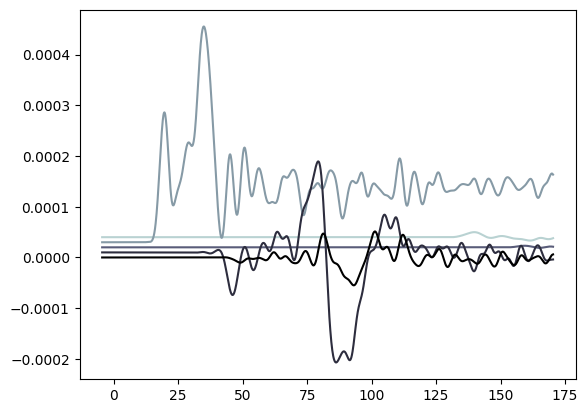

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 0.00001

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.MXZ.sem.ascii')

for i,file in enumerate(sorted(files,key=lambda x: os.path.basename(x),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

display a figure:

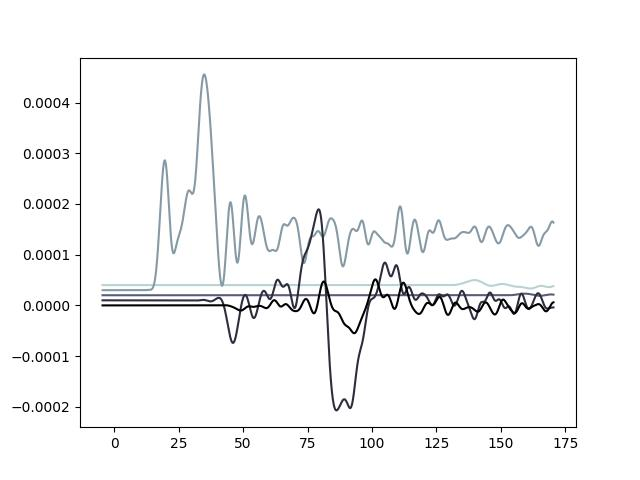

In [30]:
from IPython.display import Image, display
display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


compare the result against the reference solution:

In [39]:
! rm -f compare_seismogram_correlations.py
! ln -s ../../utils/compare_seismogram_correlations.py
! ./compare_seismogram_correlations.py REF_SEIS/ OUTPUT_FILES/


comparing seismograms
  reference directory: OUTPUT_FILES/
  output directory   : REF_SEIS/

  time step: reading from first file  REF_SEIS/GE.ZKR.MXE.sem.ascii
  time step: size =  0.125

comparing  18 seismograms

|file name                     |          corr|           err|    time shift|
|GE.ZKR.MXE.sem.ascii          |       1.00000|   2.36976e-06|   6.61093e-07| 
|GE.ZKR.MXN.sem.ascii          |       1.00000|   2.03088e-06|   8.53918e-07| 
|GE.ZKR.MXZ.sem.ascii          |       1.00000|   5.38015e-06|   3.86682e-07| 
|HT.LIT.MXE.sem.ascii          |       1.00000|   6.76226e-06|   1.97013e-06| 
|HT.LIT.MXN.sem.ascii          |       1.00000|   2.27070e-06|   1.47237e-06| 
|HT.LIT.MXZ.sem.ascii          |       1.00000|   2.50689e-06|   2.54745e-06| 
  file OUTPUT_FILES//IU.GRFO.MXE.sem.ascii not found
  file OUTPUT_FILES//IU.GRFO.MXN.sem.ascii not found
  file OUTPUT_FILES//IU.GRFO.MXZ.sem.ascii not found
|SR.BGIO.MXE.sem.ascii         |       1.00000|   9.40204e-07|  -3.82776e

all done.